In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.linalg import pinv
from scipy.stats import multivariate_normal
from scipy.stats import gamma
from scipy.stats import invgauss
from scipy.stats import reciprocal
np.set_printoptions(precision=3)
np.random.seed(0)

In [2]:
data = np.genfromtxt('reg-lr-data.csv', delimiter=',')

In [3]:
data = np.delete(data, (0), axis=0)
data = np.insert(data, 0, 1, axis=1)

In [4]:
x = data[:,:3]

In [5]:
y = data[:,3]

In [6]:
def h(theta, x):
    return 1 / (1 + np.exp(-1 * x.dot(theta)))

In [7]:
def f_grad(theta, x, y):
    return x.transpose().dot(h(theta, x) - y) / y.size + lambda_0 * theta / y.size

In [8]:
def grad_descent(theta_0, x, y, num_iter):
    theta_i = theta_0
    thetas = theta_i.reshape([1,3])
    for i in range(num_iter):
        theta_i -= step * f_grad(theta_i, x, y)
        if i % 1000 == 0:
            thetas = np.append(thetas, theta_i.reshape([1,3]), axis=0)
    return theta_i, thetas

In [9]:
def stoch_grad_descent(theta_0, x, y, num_iter, batch_size):
    theta_i = theta_0
    thetas = theta_i.reshape([1,3])
    for i in range(num_iter):
        idx = np.random.randint(0, y.size, batch_size)
        x_b = x[idx]
        y_b = y[idx]
        theta_i -= step * f_grad(theta_i, x_b, y_b)
        if i % 1000 == 0:
            thetas = np.append(thetas, theta_i.reshape([1,3]), axis=0)
    return theta_i, thetas

In [10]:
def show_plots():
    plt.scatter(x[y == 0][:, 1], x[y == 0][:, 2], color='#006633', label='0')
    plt.scatter(x[y == 1][:, 1], x[y == 1][:, 2], color='#FFCC33', label='1')
    plt.legend()
    x1_min, x1_max = x[:,1].min(), x[:,1].max(),
    x2_min, x2_max = x[:,2].min(), x[:,2].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid = np.insert(grid, 0, 1, axis=1)
    z = h(theta_f, grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, z, [.01,.5, .99], linewidths=1, colors=['gray', 'black', 'gray'])
    plt.show()
    for i in range(thetas.shape[1]):
        plt.plot(thetas[:,i], label=r"$\beta_{%d}$" % (i+1))
        plt.legend()
        plt.show()

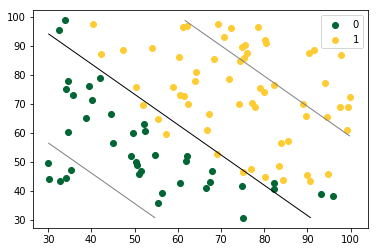

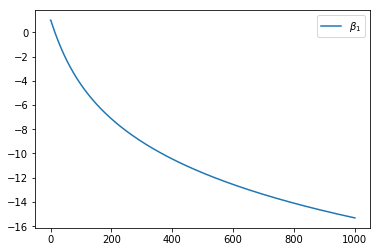

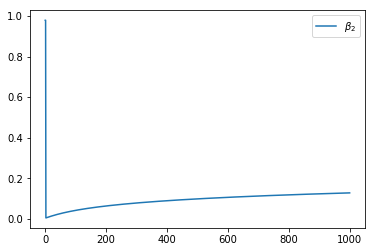

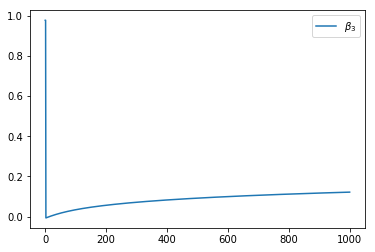

In [11]:
lambda_0 = 0
theta_0 = np.array([1.0,1.0,1.0])
step = 0.001
theta_f, thetas = grad_descent(theta_0, x, y, 1000000)
show_plots()

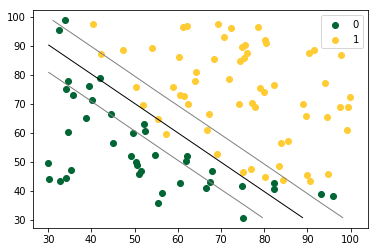

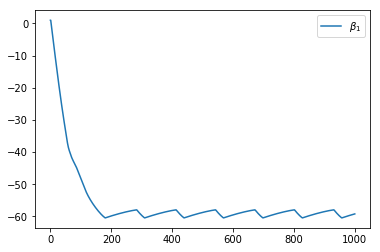

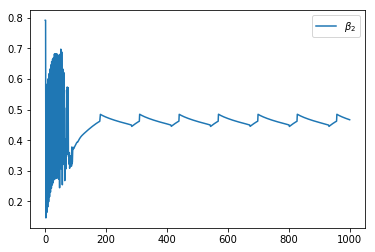

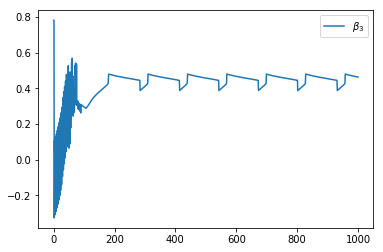

In [12]:
lambda_0 = 0
theta_0 = np.array([1.0,1.0,1.0])
step = 0.01
theta_f, thetas = grad_descent(theta_0, x, y, 1000000)
show_plots()

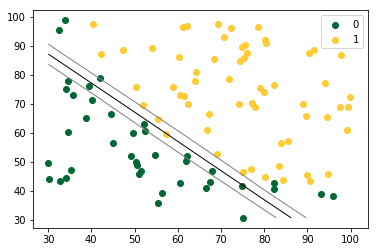

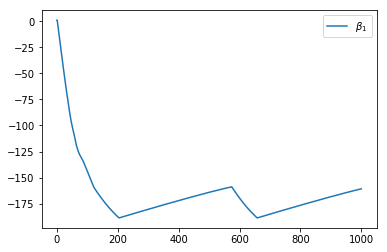

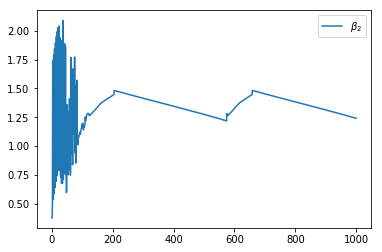

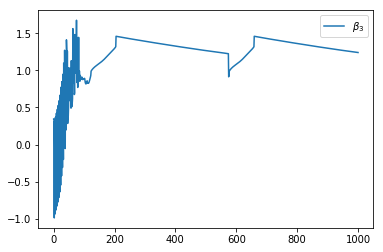

In [13]:
lambda_0 = 0
theta_0 = np.array([1.0,1.0,1.0])
step = 0.03
theta_f, thetas = grad_descent(theta_0, x, y, 1000000)
show_plots()

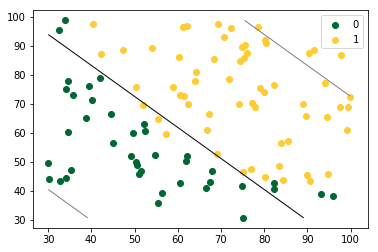

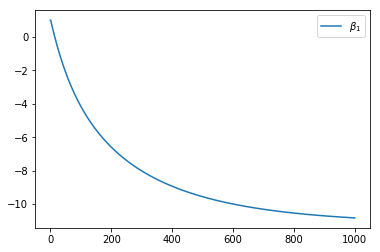

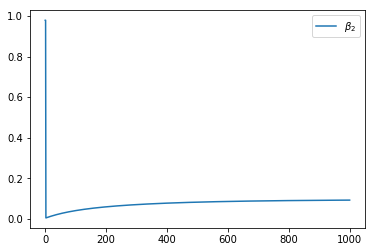

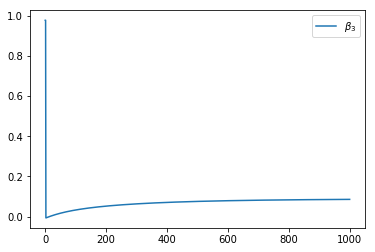

In [14]:
lambda_0 = .1
theta_0 = np.array([1.0,1.0,1.0])
step = 0.001
theta_f, thetas = grad_descent(theta_0, x, y, 1000000)
show_plots()

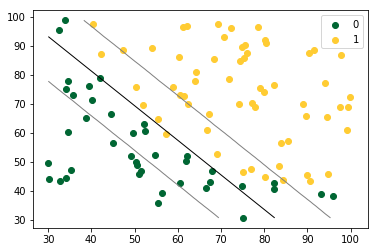

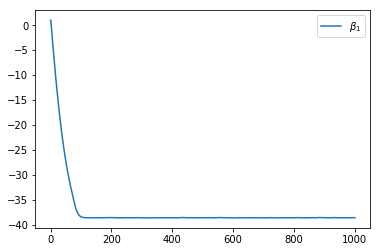

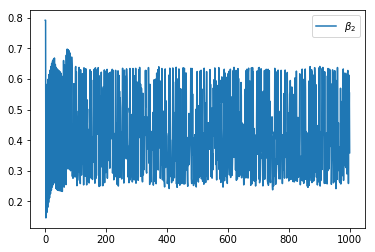

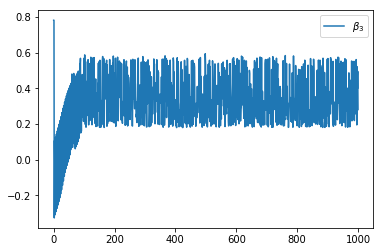

In [15]:
lambda_0 = .1
theta_0 = np.array([1.0,1.0,1.0])
step = 0.01
theta_f, thetas = grad_descent(theta_0, x, y, 1000000)
show_plots()

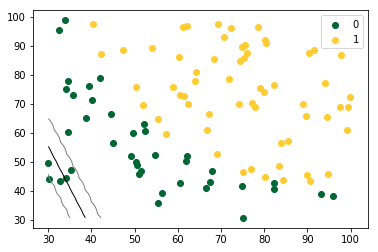

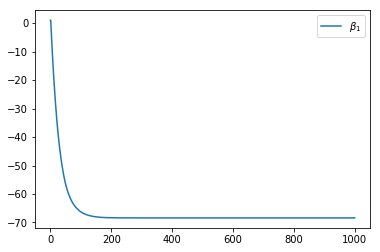

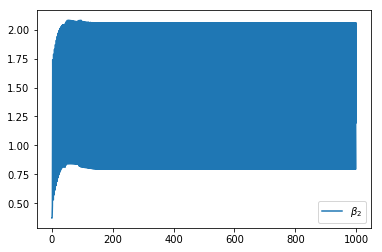

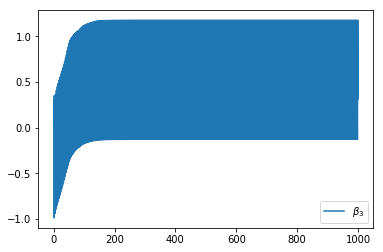

In [16]:
lambda_0 = .1
theta_0 = np.array([1.0,1.0,1.0])
step = 0.03
theta_f, thetas = grad_descent(theta_0, x, y, 1000000)
show_plots()

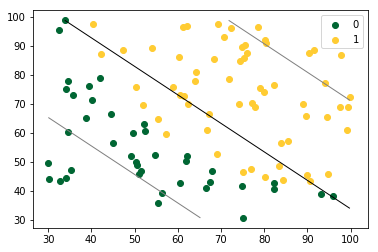

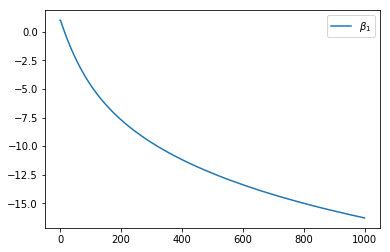

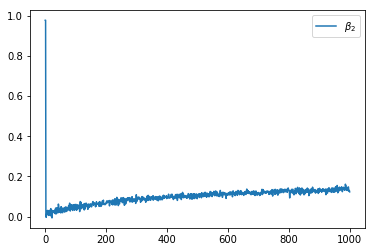

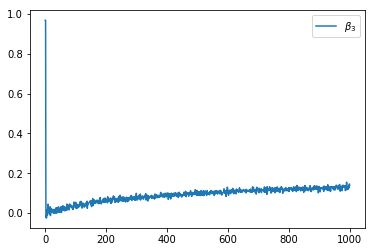

In [17]:
lambda_0 = 0
theta_0 = np.array([1.0,1.0,1.0])
step = 0.001
theta_f, thetas = stoch_grad_descent(theta_0, x, y, 1000000, 10)
show_plots()

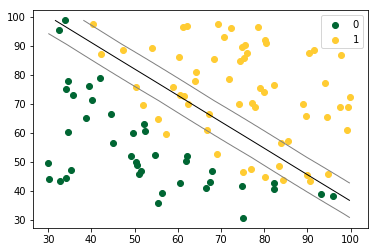

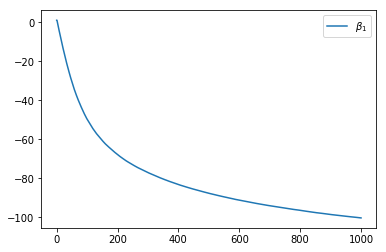

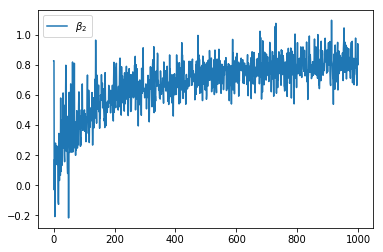

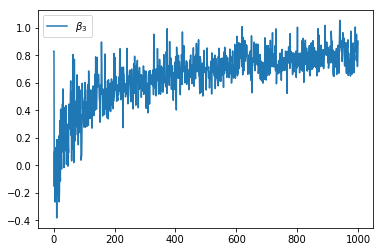

In [18]:
lambda_0 = 0
theta_0 = np.array([1.0,1.0,1.0])
step = 0.01
theta_f, thetas = stoch_grad_descent(theta_0, x, y, 1000000, 10)
show_plots()

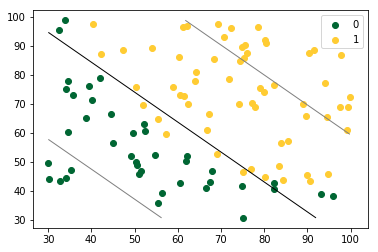

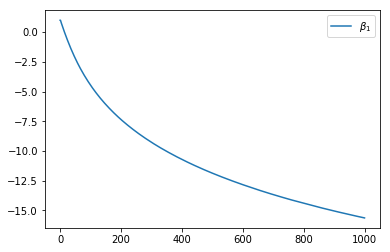

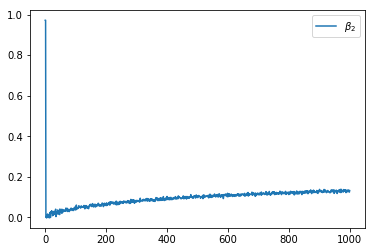

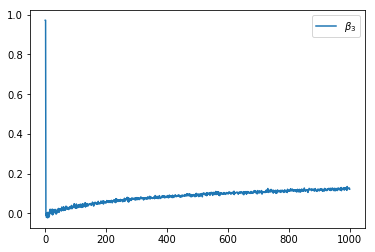

In [19]:
lambda_0 = 0
theta_0 = np.array([1.0,1.0,1.0])
step = 0.001
theta_f, thetas = stoch_grad_descent(theta_0, x, y, 1000000, 30)
show_plots()

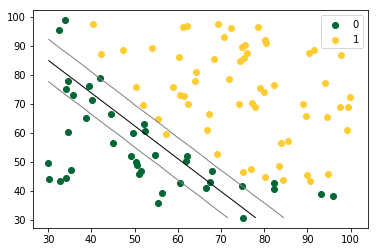

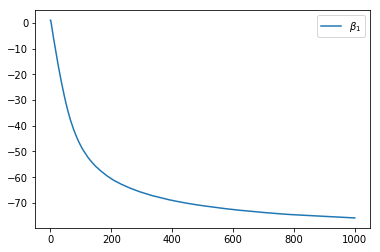

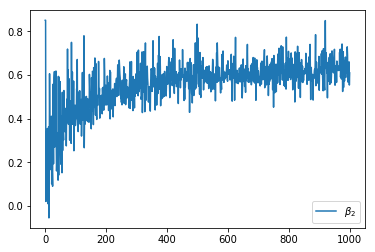

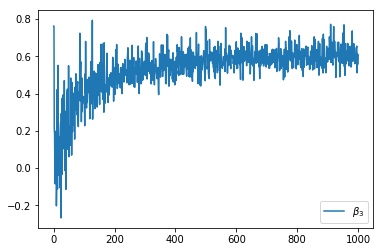

In [20]:
lambda_0 = 0
theta_0 = np.array([1.0,1.0,1.0])
step = 0.01
theta_f, thetas = stoch_grad_descent(theta_0, x, y, 1000000, 30)
show_plots()

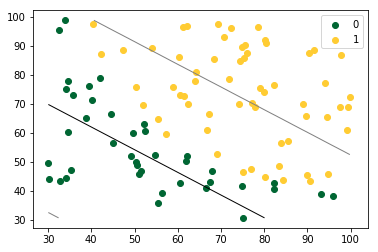

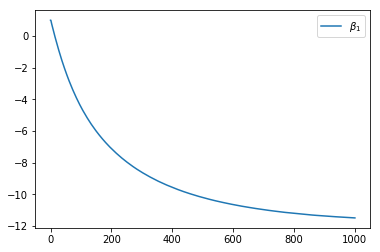

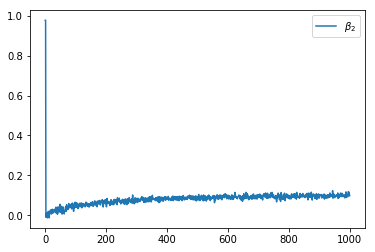

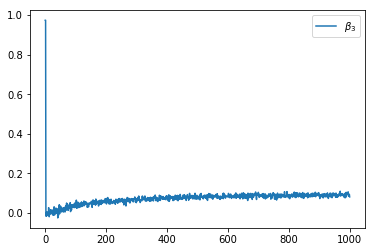

In [21]:
lambda_0 = 0.01
theta_0 = np.array([1.0,1.0,1.0])
step = 0.001
theta_f, thetas = stoch_grad_descent(theta_0, x, y, 1000000, 10)
show_plots()

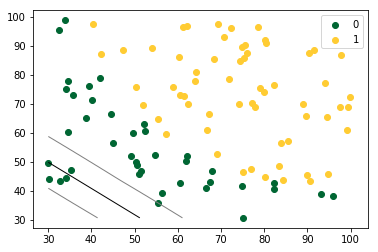

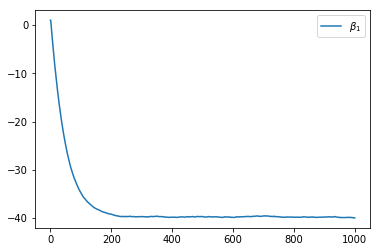

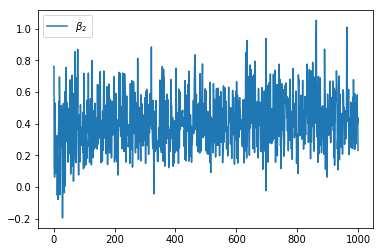

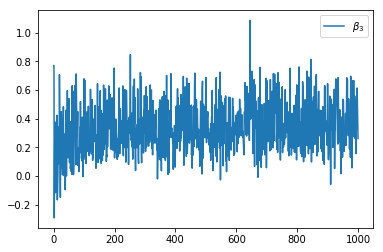

In [22]:
lambda_0 = 0.01
theta_0 = np.array([1.0,1.0,1.0])
step = 0.01
theta_f, thetas = stoch_grad_descent(theta_0, x, y, 1000000, 10)
show_plots()

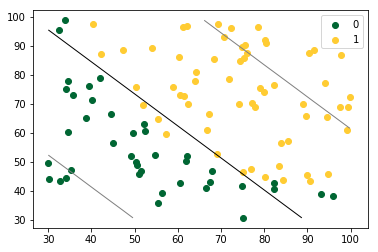

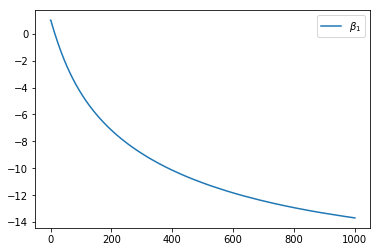

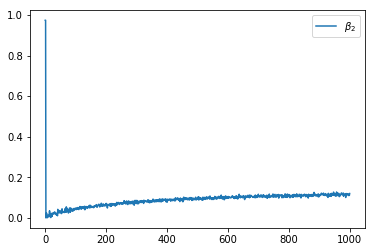

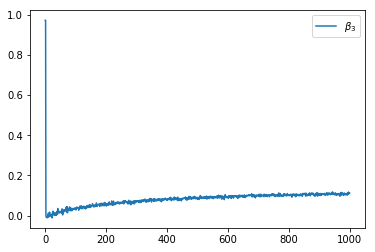

In [23]:
lambda_0 = 0.01
theta_0 = np.array([1.0,1.0,1.0])
step = 0.001
theta_f, thetas = stoch_grad_descent(theta_0, x, y, 1000000, 30)
show_plots()

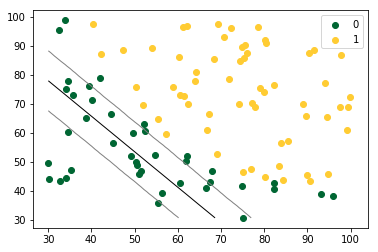

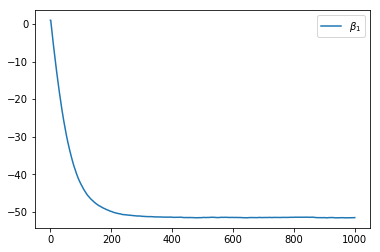

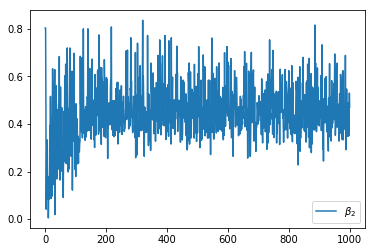

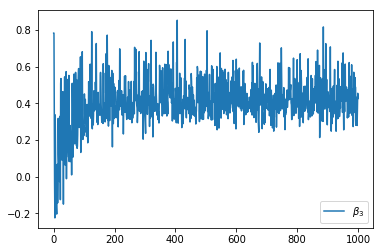

In [24]:
lambda_0 = 0.01
theta_0 = np.array([1.0,1.0,1.0])
step = 0.01
theta_f, thetas = stoch_grad_descent(theta_0, x, y, 1000000, 30)
show_plots()